<hr style="border-top: 5px solid black; margin-top: 1px; margin-bottom: 1px"></hr>

<font size=6 color='red'><strong>Regression Modeling</strong></font>

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

<div style="text-align: right"><font size=4 color='black'><strong>Jamie Stone, Anna Yakovleva, Matt Deane & Pete Brecknock </strong></font></div>

## <font color='red'>Introduction To Linear Regression</font>

In [48]:
# Initialize
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%matplotlib inline

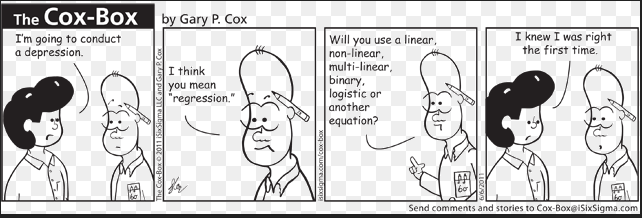

In [3]:
# Hopefully Not
from IPython.display import Image
Image("./Regression3.png", width =1000)

### Advertizing Data - Exploratory Data Analysis (EDA)

In [7]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Features

- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

Response

- Sales: sales of a single product in a given market (in thousands of widgets)

In [9]:
# print the shape of the DataFrame
data.shape

(200, 4)

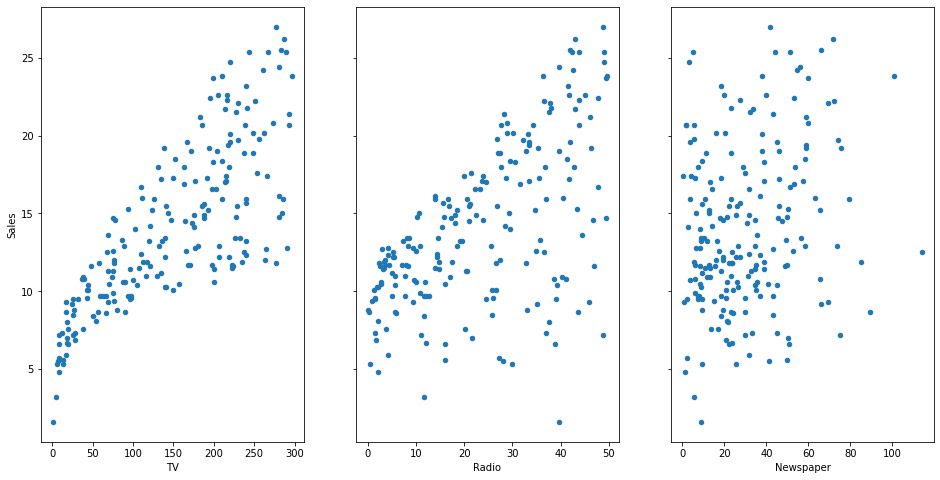

In [14]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

### Simple Linear Regression
Simple linear regression is an approach for predicting a quantitative response using a <b><u>single</b></u> feature (or "predictor" or "input variable"). It takes the following form:

𝑦=𝛽0+𝛽1𝑥 

What does each term represent?

- 𝑦  is the response (Sales)
- 𝑥  is the feature (we will use TV initially)
- 𝛽0  is the intercept
- 𝛽1  is the coefficient for x

Together,  𝛽0  and  𝛽1  are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales

Generally speaking, coefficients are estimated using the <b><u>least squares</b></u> criterion, which means we are find the line (mathematically) which minimizes the <b><u>sum of squared residuals</b></u> (or "sum of squared errors"):

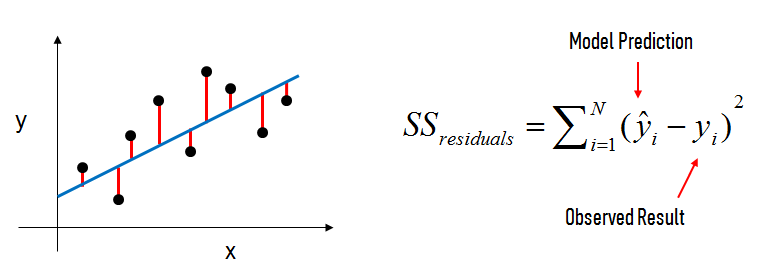

In [5]:
#Sum of Squared Residuals
Image("./EstimatingCoeffs.png")

What elements are present in the diagram?

- The black dots are the observed values of x and y (TV advertizing spend & Product Sales).
- The blue line is our least squares line.
- The red lines are the residuals, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?

- 𝛽0  is the intercept (the value of  𝑦  when  𝑥 =0)
- 𝛽1  is the slope (the change in  𝑦  divided by change in  𝑥 )

Here is a graphical depiction of those calculations:

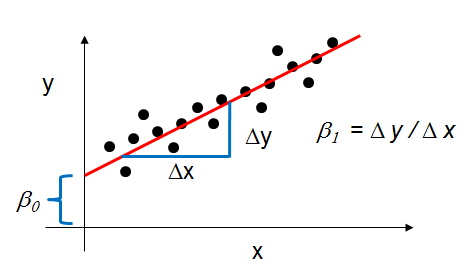

In [6]:
# Calculation Image
Image("./Slope_intercept.png")

Let's use <font size=3 color='blue'><b>statsmodels</b></font> to estimate the model coefficients for the advertising data:

In [20]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

###  Interpreting Model Coefficients
How do we interpret the TV coefficient ( 𝛽1 )?

A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.

Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a decrease in sales,  𝛽1  would be negative.

### Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$y = \beta_0 + \beta_1x$ <br>
$y = 7.032594 + 0.047537 \times 50$ <br>
$y = 9.409$

In [21]:
# Using statsmodels
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
lm.predict(X_new)

0    9.409426
dtype: float64

### Is TV spending a useful indicator of sales?

In [29]:
# lm.summary() gives full model details

# Just the coefficients ....
res = lm.summary().tables[1].as_html()
pd.read_html(res, header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.0,6.130,7.935
TV,0.0475,0.003,17.668,0.0,0.042,0.053


As it relates to model coefficients, the conventional hypothesis test:

- null hypothesis: There is no relationship between TV ads and Sales (and thus  𝛽1  equals zero)
- alternative hypothesis: There is a relationship between TV ads and Sales (and thus  𝛽1  is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval does not include zero. Conversely, the p-value represents the probability that the coefficient is actually zero:


If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

<b>In this case, the p-value for TV is far less than 0.05, and so we believe that there is a relationship between TV ads and Sales.</b>

Note that we generally ignore the p-value for the intercept.

### How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

In [31]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

### Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

𝑦=𝛽0+𝛽1𝑥1+...+𝛽𝑛𝑥𝑛 

Each  𝑥  represents a different feature, and each feature has its own coefficient. In this case:

𝑦=𝛽0+𝛽1×𝑇𝑉+𝛽2×𝑅𝑎𝑑𝑖𝑜+𝛽3×𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟 

Let's use Statsmodels to estimate these coefficients:

In [32]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        18:11:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant p-values, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both positively associated with Sales, whereas Newspaper ad spending is slightly negatively associated with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher R-squared (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

### Feature Selection

How do I decide which features to include in a linear model? Here's one idea:

- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the drawbacks to this approach?

- Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are pure noise, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to <u><b>overfitting</b></u>, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [58]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
round(lm.rsquared,6)

0.897194

In [57]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
round(lm.rsquared,6)

0.897211

R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called adjusted R-squared that penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.

We will cover model building strategies as we work through the examples later in this course

## <font color='red'>Potential Pitfalls of Linear Regression</font>

 ### Non-linearity of the response-predictor relationships

### Correlation of error terms

### Non-constant variance of error terms

### Outliers

### High-leverage points

### Collinearity

## <font color='red'>Worked Examples in Dataiku</font>

### Link To Example 1

### Link To Example 2